## Applied Data Science
#### Assignment 2


Sunina, Sharvy, Student ID # 21031313

In [35]:
#Importing Modules & Libraries for the use of this project
import pandas as pd
import wbgapi as wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.collections
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

##### Defining Functions

In [36]:
#Functions used for this projects mentioned below

def World_Bank_Reader(wb_file_name):
    
    """This is the docstring of the function World_Bank_Reader to read the data from the world bank csv
    file downloaded from the world bank site"""
    
    cchange_df = pd.read_csv(wb_file_name, skiprows=4)
    
    cchange_df.drop(cchange_df.columns[[-1]], axis=1, inplace=True)
    
    #Deriving data with Years as columns
    year_df = cchange_df[:]  
    
    #Deriving dataframe with country name as columns
    country_df = cchange_df.groupby(['Country Name']).aggregate('first').transpose() 
    
    return country_df, year_df


def heat_map(data):
    
    """This is the docstring of the function heat_map. It describes the corelation between the indicators """
    
    plt.figure(figsize=(14,8)) # Adjusting the figure size
    sns.heatmap(data, annot=True, cmap="YlGnBu")  # Using heatmap function from the SNS library for ploting heat map
    
    plt.show()

    
def WB_Time_Series_Plt(wb_data, Y_Indicator, xlbl, ylbl, plt_title, colour):
    
    """This is the docstring of the function WB_Time_Series_Plt to plot the time series."""
    
    plt.rcParams['figure.figsize']=(6, 6)  #Setting the figure size
    
    time_data = wb_data[:]                 #Assigning data attributes to the local variable
    
    # Removing the World information data to process the data easily
    time_data = time_data[time_data['Country Code']!='World'] 
    
    #Grouping data using Indicator code
    time_data = time_data.groupby(['Indicator Code']).aggregate('mean').transpose().fillna(0)
    
    # Saving Timing data derived usign Indicator as the index
    time_data = time_data[[Y_Indicator]]
    
    #Resetting the Index to normal
    time_data = time_data.reset_index()
    
     #Renaming the Data frame Index as an year
    time_data = time_data.rename(columns={'index':'Year'})
    
    time_data.Year = time_data.Year.values.astype(int)
    
    #ploting the Time series
    plt.plot(time_data['Year'], time_data[Y_Indicator], color=colour) 
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.title(plt_title)
    
    plt.show()
    
    
def World_Bank_Single_Reader(Indicator, country_codes, start_year, end_year):
    
    """This docstring function is used as an alternate method for 
    accessing indicator data from world bank website """
    
    cchange_df = wb.data.DataFrame(Indicator, country_codes, time=range(start_year, end_year))
    
    country_df = cchange_df.transpose()  #Transpose To get the Year Values as a main column
    
    country_df.index.names = ["Years"]

    return country_df


def Bar_Plt_Multi(data):
    
    """This is the docstring of the function Bar_Plt_Multi is used to plot 
    the bar graph for multiple indicators"""
    
    #Setting up the axis information to fit on the Bar plot
    ax = data.unstack(level=0).plot(kind='bar', subplots=True, rot=90, figsize=(18, 14), layout=(4, 2))
    plt.tight_layout()

    
def histogram_plt(data, country_code, indicator, xlbl, plt_title, colour):
    
    """This docstring for the function histogram_plt is used for ploting the Histogram 
    using the data frame and corresponding indicator """
    
    plt.rcParams['figure.figsize']=(5, 5)
                                                                       
    data_1 = data[country_code]
    data_2 = data_1[indicator]
                                                                       
    plt.hist(data_2, bins=15, color=colour)
    
    plt.xlabel(xlbl)
    plt.ylabel("Count")
    plt.title(plt_title)
                                                                       
    plt.show()
    
def bar_plt_log(Data, X ,Y1, Y2, Y3):
    
    """This docstring for the function bar_plt_log is used for ploting the bar graph in logarthimic format
     Y axis contains logarthmic values of indicators and X axis takes 3 indicators with different countries"""
    
    plt.rcParams['figure.figsize']=(6, 6) 
    colors = sns.color_palette('deep')
    Data.plot(x=X, y=[Y1,Y2,Y3], kind="bar")
    
    plt.yscale('log')
    plt.xlabel('Country')
    plt.ylabel('Logarthimic Mean Values')
    plt.title('Impact of Land Area on Pollution')
    
    

def sort(sort_data):
    """This doc string for the function sort is used for Sorting the data frame with Median."""
    
    return sort_data.sort_values(ascending=False, by='median')


##### Mapping of World Bank Indicators ID to Varibales

In [37]:
#Defining Global Variables & List used for the use of data manipulation

#Indicator_replace list used to replace the Indicator code with an understandig words
Indicator_replace = {"EN.ATM.PM25.MC.M3":"Pollution", "EN.ATM.CO2E.PC":"CO2", "AG.LND.FRST.K2":"Land", 
                     "SP.POP.TOTL":"Population", "EG.USE.PCAP.KG.OE":"Energy_Use", "EG.ELC.ACCS.ZS":"Electricity_Access",
                     "EG.FEC.RNEW.ZS":"Renewable_Energy_Use", "AG.LND.ARBL.ZS":"Arable_Land"}

#setting up the start & end year for the data frame from World bank
start_year = 1960
end_year = 2020

Population ="SP.POP.TOTL"
CO2= "EN.ATM.CO2E.PC"
Land= "AG.LND.FRST.K2"

#Indicator_map used for maping the data-frame with corresponding indicators used by World bank data
Indicator_map =["EN.ATM.PM25.MC.M3", "EN.ATM.CO2E.PC", "AG.LND.FRST.K2", "SP.POP.TOTL", 
                "EG.USE.PCAP.KG.OE", "EG.ELC.ACCS.ZS", "AG.LND.ARBL.ZS", "EG.FEC.RNEW.ZS"]

#Country_codes used for defining the Country with standard & a globally accepted codes used
country_codes = ["GBR", "IND", "ZAF", "AFG", "RUS", "CHN", "FIN", "USA", "AUS", "ARE"]

country_names = {'GBR':'United Kingdom', 'IND':'India', 'ZAF':'South Africa', 'AFG':'Afghanisthan',
                 'RUS':'Russian Federation', 'CHN':'China', 'FIN':'Finland', 'USA':'United States', 
                 'AUS':'Australia', 'ARE':'United Arab Emirates'}


##### Reading Data Frames using Function

In [38]:
#Assigning World Bank Data file name to a variable
wb_file_name = 'World_Bank_Data_File.csv'


In [39]:
#Using World Bank Reader function defined in the function section 
#to generate 2 data frames as per the assignment requirement

country_df, year_df = World_Bank_Reader(wb_file_name)


###### Dataframe with Countries as columns

In [40]:
#Printing the Data frame with countries as columns
country_df.head()

Country Name,Afghanistan,Africa Eastern and Southern,Africa Western and Central,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
Country Code,AFG,AFE,AFW,ALB,DZA,ASM,AND,AGO,ATG,ARB,...,UZB,VUT,VEN,VNM,VIR,PSE,WLD,YEM,ZMB,ZWE
Indicator Name,Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),...,Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population)
Indicator Code,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,...,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS
1960,8.401,14.704688,14.670329,30.705,30.51,66.211,58.45,10.435,39.656,31.234142,...,33.978,10.404,61.613,14.7,56.477,44.044,33.617972,9.1,18.145,12.608
1961,8.684,14.944459,15.053577,30.943,31.797,66.641,60.983,10.798,39.04,31.979927,...,34.238,10.583,62.875,15.031,57.864,44.734,34.11549,9.459,18.951,12.821


###### Dataframe with Years as columns

In [41]:
#Printing the Data frame with Years as columns

year_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.940000,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27525.000,28139.000000,28537.000000,28763.000000,28922.000000,29080.000000,...,43820.000000,44059.000000,44351.000000,44666.000000,44978.000000,45293.000000,45614.000000,45949.000000,46294.000000,46654.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.206183,1.404498,0.788835,0.551271,0.544810,...,0.100461,0.543931,0.660561,0.707733,0.696090,0.697901,0.706219,0.731740,0.748028,0.774631
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.000,55434.000000,56234.000000,56699.000000,57029.000000,57357.000000,...,102050.000000,102565.000000,103165.000000,103776.000000,104339.000000,104865.000000,105361.000000,105846.000000,106310.000000,106766.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.236462,1.432843,0.823502,0.580334,0.573498,...,0.377979,0.503385,0.583290,0.590508,0.541048,0.502860,0.471874,0.459266,0.437415,0.428017


###### Re-arranging Data frame for the Statistical Analysis

In [42]:
# Filtering out the required indicators for the anlysis from the previously defined Indicator Map list
year_df_new = year_df[year_df['Indicator Code'].isin(Indicator_map)]


In [43]:
# Replacing not identifiable Indicator code into a known Identifiers
year_df_new["Indicator Code"].replace(Indicator_replace, inplace=True)

#To avoid warning related to the 'caveat'
year_df_new = year_df_new.copy(deep=True) 


In [44]:
# Droping Country Name  & Indicator Name as it is already defined
year_df_new = year_df_new.drop(['Country Name','Indicator Name'], axis = 1, inplace = False)


In [45]:
#Filtering out the required list of countries for the anlysis from the previously defined Country_Code List
country_data = year_df_new.loc[year_df_new['Country Code'].isin(country_codes)].reset_index()

#Normalizing the index for the easy analysis
country_data.drop(['index'], axis=1, inplace=True)

country_data.head()


,Country Code,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AFG,Population,8.996967e+06,9.169406e+06,9.351442e+06,9.543200e+06,9.744772e+06,9.956318e+06,1.017484e+07,1.039994e+07,...,3.011741e+07,3.116138e+07,3.226959e+07,3.337080e+07,3.441360e+07,3.538303e+07,3.629611e+07,3.717192e+07,38041757.0,38928341.0
1,AFG,CO2,4.605674e-02,5.358886e-02,7.372082e-02,7.416076e-02,8.617369e-02,1.012849e-01,1.073988e-01,1.234094e-01,...,4.070735e-01,3.353510e-01,2.637158e-01,2.340369e-01,2.321756e-01,2.088572e-01,2.033276e-01,2.001511e-01,NaN,NaN
2,AFG,Energy_Use,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Renewable_Energy_Use,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.155910e+01,1.440490e+01,1.710500e+01,2.077030e+01,2.027380e+01,2.474030e+01,2.508280e+01,2.142270e+01,NaN,NaN
4,AFG,Electricity_Access,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.322202e+01,6.910000e+01,6.898294e+01,8.950000e+01,7.150000e+01,9.770000e+01,9.770000e+01,9.871562e+01,97.7,NaN


In [46]:
# Generating & Grouping Statistics data with Country code & Indicator code
stat_data = country_data.groupby(['Country Code','Indicator Code']).aggregate('sum').transpose()
stat_data.head()


Country Code           AFG                                               \
Indicator Code Arable_Land       CO2 Electricity_Access Energy_Use Land   
1960              0.000000  0.046057                0.0        0.0  0.0   
1961             11.717673  0.053589                0.0        0.0  0.0   
1962             11.794259  0.073721                0.0        0.0  0.0   
1963             11.870845  0.074161                0.0        0.0  0.0   
1964             11.947431  0.086174                0.0        0.0  0.0   

Country Code                                           ARE            \
Indicator Code Population Renewable_Energy_Use Arable_Land       CO2   
1960            8996967.0                  0.0    0.000000  0.119037   
1961            9169406.0                  0.0    0.070403  0.109136   
1962            9351442.0                  0.0    0.070403  0.163542   
1963            9543200.0                  0.0    0.070403  0.175833   
1964            9744772.0                  0.0    0.070403  0.132815   

Country Code                       ...  USA                                    \
Indicator Code Electricity_Access  ... Land   Population Renewable_Energy_Use   
1960                          0.0  ...  0.0  180671000.0                  0.0   
1961                          0.0  ...  0.0  183691000.0                  0.0   
1962                          0.0  ...  0.0  186538000.0                  0.0   
1963                          0.0  ...  0.0  189242000.0                  0.0   
1964                          0.0  ...  0.0  191889000.0                  0.0   

Country Code           ZAF                                               \
Indicator Code Arable_Land       CO2 Electricity_Access Energy_Use Land   
1960              0.000000  5.727223                0.0        0.0  0.0   
1961              9.892094  5.832621                0.0        0.0  0.0   
1962              9.933311  5.887168                0.0        0.0  0.0   
1963              9.974528  5.961337                0.0        0.0  0.0   
1964             10.015745  6.332343                0.0        0.0  0.0   

Country Code                                     
Indicator Code  Population Renewable_Energy_Use  
1960            17099836.0                  0.0  
1961            17524533.0                  0.0  
1962            17965733.0                  0.0  
1963            18423157.0                  0.0  
1964            18896303.0                  0.0  

[5 rows x 70 columns]

##### Globally Defining Settings for the Graph style & Font

In [47]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18) # fontsize of the axes title
plt.rc('axes', labelsize=14) # fontsize of the x and y labels
plt.rc('xtick', labelsize=13) # fontsize of the tick labels
plt.rc('ytick', labelsize=13) # fontsize of the tick labels
plt.rc('legend', fontsize=13) # legend fontsize
plt.rc('font', size=13) # controls default text sizes

#### Finding Correlation Between Indicators

In [48]:
# Finding any correlation between the indicators choosen using corr() function
Indicator_corr = pd.pivot_table(country_data, index='Indicator Code', aggfunc='mean').transpose().corr()


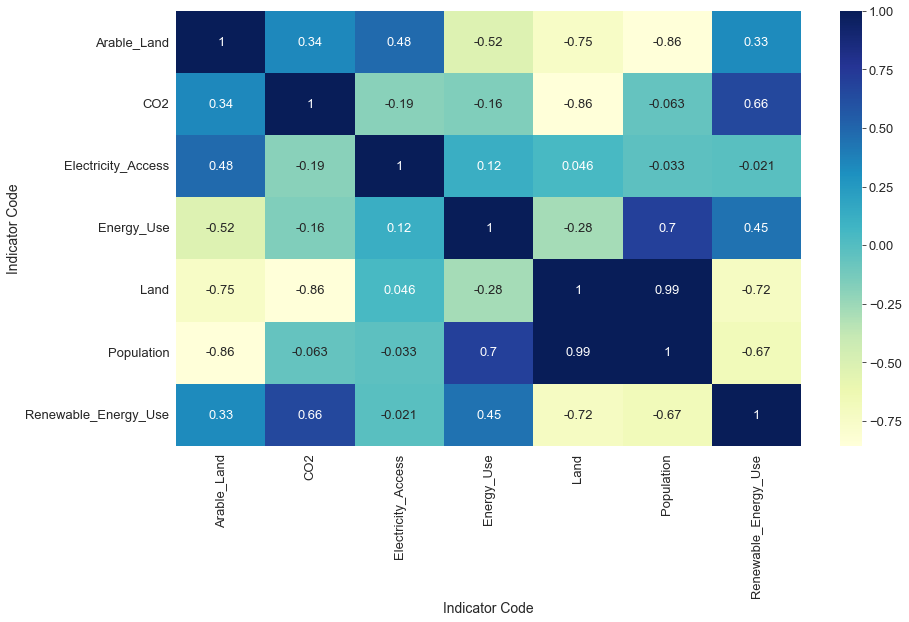

In [49]:
#Calling Heat Map function from the defined functions for plotting the correlation
heat_map (Indicator_corr)  


#### Indicators Correlation

From the above correlation heat map, we can easily point out below details

<li> Renewable Energy Usage is negatively correlated to Electricity Access.In other words, If the peoples have lesser access to electricity tends to use the Renewable Energies
<li> Renewable Energy use is positively correlated to the carbon emission.
<li> The Land area derived from the Forest is highly correlated to the Population.If the population is increasing, the land area also increasing.
<li> When the population is increasing , the energy usage also increasing becuase both poses highly postivive correlation.
<li> Arabale Land area is negatively correlated to the Population. When the Population increases, the Arable land area decreases

### Statistical Analysis

##### 1 - Impact of Land area & Carbon Pollution

,Country,Population,Pollution,Land
0,CHN,1.088961e+09,4.429579,1.876952e+06
1,IND,8.805874e+08,1.102646,6.824163e+05


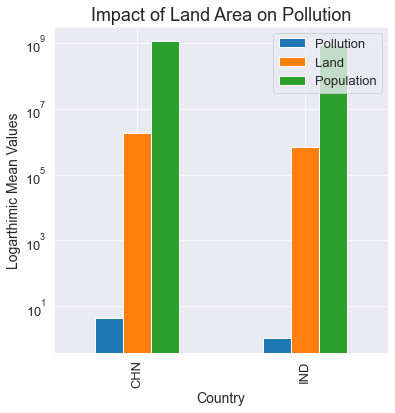

##### 2. Time Series Analysis of the Population & Carbon Emissions

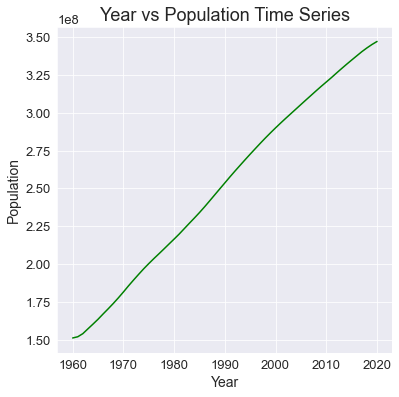

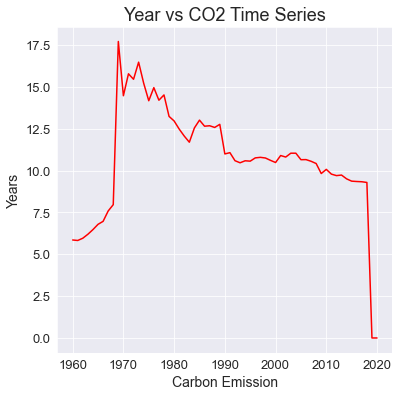

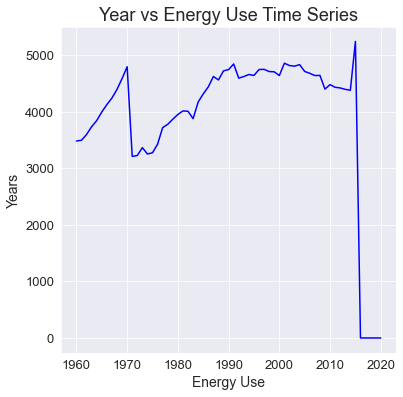

From the above time series analysis we can clearly see that the Population is rapidly increasing. The Energy use also increasing. But the Carbon emission is reducing considerably because of the use of Renewable Energy & Awarness about the carbon emissions

##### 3 Highest Energy Consumption,Carbon Emissions  & Energy Use(using Median)

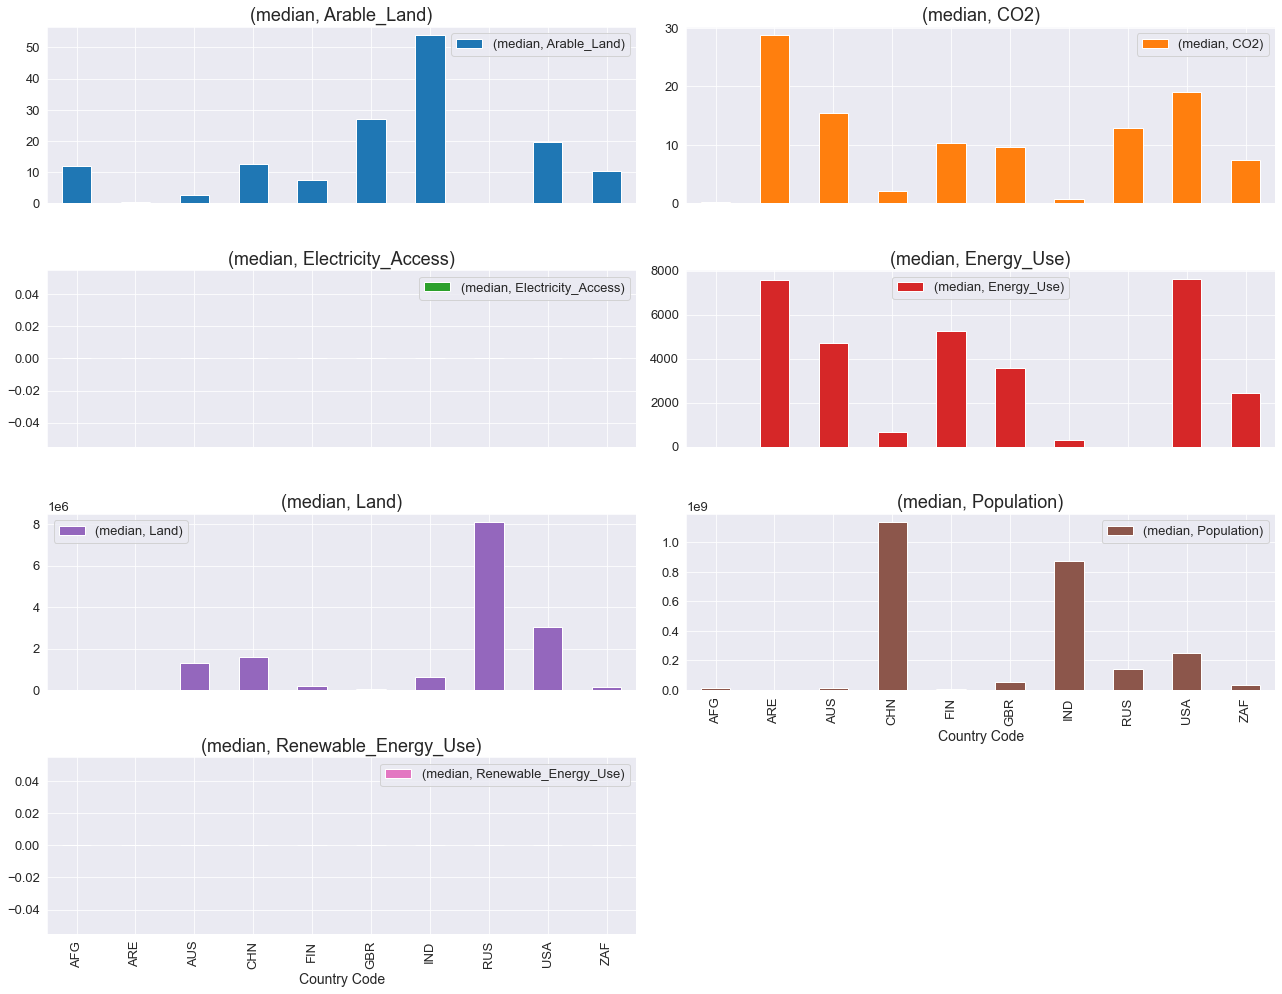

##### 4 Energy Use of Higher Population Regions with Middle East Country using Histogram

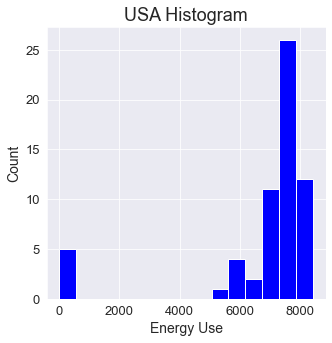

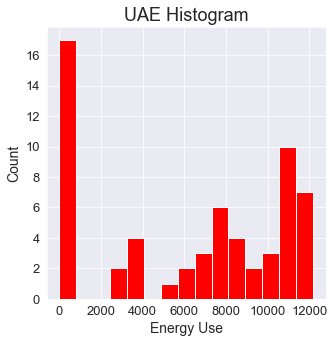

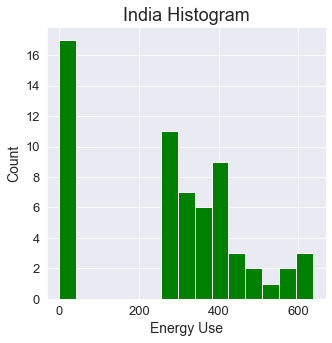

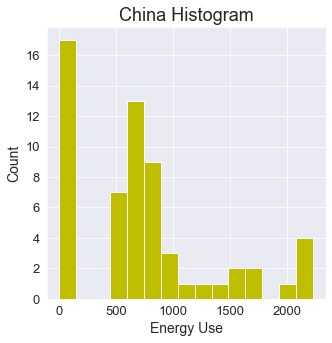